# Libraries

In [1]:
!pip install plotly
!pip install numpy
!pip install scikit-learn
!conda install -c plotly plotly-orca -y

Solving environment: done

# All requested packages already installed.



In [2]:
import numpy as np
from utils.charts import create_figure, plot_figure
from utils.data import load_dataset, one_hot, fold_data, normalization, explore_data
from utils.metrics import calc_metrics, metric_summary
from utils.NeuralNetwork import model, predict

# General Steps
Each experiment will consist of the following steps:
*   Load and split dataset into `x_data` and `y_data`.
*   Explore loaded data and class distribution.
*   Normalize `x_data` and apply `one-hot-encoding` to `y_data`.
*   Define model structure(layer sizes, learning rate, number of iterations and number of folds).
*   Fold the data according to the values defined previously.
*   For each different `fold` create a `train_dataset` with all the folds except the current one which will be the `test_dataset`.
*   We will be creating a new `model` with the previously defined strtucture.
*   Execute experiment consists of training and validating the model with the current `train_dataset` and `test_dataset` which we will call `EPOCH`.
*   At the end of each `EPOCH` we will show the `accuracy`, the `avg_cost` and the `confusion matrix`.
*   Once all the `EPOCHS` conclude we will show a `Summary of metrics` which contains `avg`, `std` and `median` for `cost` and `accuracy` of the experiment as a whole.
*   Finally we plot a `chart` in which we can observe the behaviour of the `avg_cost` through the `number of iterations`.

It is important to notice that the `confusion matrix` is being calculated using the `sklearn` library using as parameters the `expected_output` and `predicted_output`. This allows us to observe not only the accuracy of each class (diagonal) but also the relationship that classes may have between them. Another possible use case could be the extraction of the `Recall` value for each class.
 

In [3]:
def kfold_cross_validation(
    folded_data,input_layer_size,hidden_layer_size,output_layer_size,\
    number_of_iterations, learning_rate, number_of_folds
):
    # Showing details of model structure
    print(f"Model parameters:\n\n input_layer_size: {input_layer_size} | hidden_layer_size: {hidden_layer_size} | output_layer_size: {output_layer_size}")
    print(f" number_of_iterations: {number_of_iterations} | learning_rate: {learning_rate} | number_of_folds: {number_of_folds}")
    historic_acc = []
    historic_cost = []
    # Iterating for each fold
    for k in range(number_of_folds):
        print(f"\n################## EPOCH with test fold = {k} ##################")
        train_data = []
        test_data = []
        for j in range(number_of_folds):
            # All folds different than the current one will be part of train_data
            if j != k:
                train_data += folded_data[j]
            # Current fold will be the test_data
            else:
                test_data += folded_data[j]
        x_train, y_train = zip(*train_data)
        x_test, y_test = zip(*test_data)
        
        # Model construction
        trained_params,current_cost = model(
            np.transpose(x_train),
            np.transpose(y_train),
            input_layer_size,
            hidden_layer_size,
            output_layer_size,
            number_of_iterations,
            learning_rate
        )
        # Running trained model with the current test_data
        y_predict = predict(np.transpose(x_test), trained_params).transpose()
        
        # Storing metric data for plotting and summary
        historic_acc.append(calc_metrics(y_test, y_predict, current_cost))
        historic_cost.append(current_cost)

    return historic_acc,historic_cost

## Dataset `Handwritten Digits`

The first set of experiments we will be doing is using the [handwritten digits](https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits) dataset. The information inside it represents digits written using a pen and a tablet with a `500x500` resolution. Each row in the dataset is an individual example of a digit and is represented with a set of 8 (x, y) points (integers) followed by the corresponding class which will be the number itself.

In [4]:
x_data,y_data = load_dataset("../resources/datasets/handwritten.txt",dtype=np.int64)

In [5]:
# Explore data and class distribution
explore_data(y_data,10)

class: 0 | 780 (10.41%) instances
class: 1 | 779 (10.39%) instances
class: 2 | 780 (10.41%) instances
class: 3 | 719 (9.59%) instances
class: 4 | 780 (10.41%) instances
class: 5 | 720 (9.61%) instances
class: 6 | 720 (9.61%) instances
class: 7 | 778 (10.38%) instances
class: 8 | 719 (9.59%) instances
class: 9 | 719 (9.59%) instances
Total number of instances: 7494


After exploring the data we can observe that it contains `7494` examples of `10` well balanced classes.

In [6]:
# Using the utility we built to normalize the values of the input layer
x_data = normalization(x_data)

In [7]:
# Applying one-hot encoding to the expected classes understanding that
# the result of this transformation is also normalized
y_data = one_hot(y_data,10)

*   ### Experiment #1

In [8]:
LEARNING_RATE = 0.1
NUMBER_OF_ITERATIONS = 1000
HIDDEN_LAYER_SIZE = 10
INPUT_LAYER_SIZE = 16
OUTPUT_LAYER_SIZE = 10
NUMBER_OF_FOLDS = 10

In [9]:
# Dividing the data in `k` folds as a first step for `k-cross-validation`
folded_data = fold_data(list(zip(x_data,y_data)),k=NUMBER_OF_FOLDS)

In [10]:
historic_acc, historic_cost = kfold_cross_validation(
    folded_data,
    INPUT_LAYER_SIZE,
    HIDDEN_LAYER_SIZE,
    OUTPUT_LAYER_SIZE,
    NUMBER_OF_ITERATIONS,
    LEARNING_RATE,
    NUMBER_OF_FOLDS
)

Model parameters:

 input_layer_size: 16 | hidden_layer_size: 10 | output_layer_size: 10
 number_of_iterations: 1000 | learning_rate: 0.1 | number_of_folds: 10

################## EPOCH with test fold = 0 ##################
 Accuracy: 83.18%
 Avg cost: 0.00010

 Confusion Matrix:
 [[73  0  0  0  2  2  1  0  2  2]
 [ 0 56 10  2  0  0  0  1  0  6]
 [ 0  2 82  0  0  0  0  0  0  0]
 [ 0  1  0 58  0  0  0  1  0  0]
 [ 0  0  0  0 64  0  1  0  0  1]
 [ 0  0  0 10  0 46  1  3  4 16]
 [ 0  0  0  0  1  0 73  0  0  3]
 [ 0  0  0  1  0  0  0 72  0  0]
 [25  1  0  0  0  2  0  4 42  1]
 [ 0  1  0  3  6  8  0  0  2 57]]

################## EPOCH with test fold = 1 ##################
 Accuracy: 82.11%
 Avg cost: 0.00009

 Confusion Matrix:
 [[66  2  0  0  1  0  0  0  2  6]
 [ 0 45  8  7  2  2  0 15  2  0]
 [ 0  0 61  0  0  0  0 12  0  0]
 [ 0  0  0 62  1  0  0  0  0  0]
 [ 0  0  0  0 81  1  0  0  0  1]
 [ 0  0  0  4  0 44  3  1  3 14]
 [ 0  0  0  0  1  2 82  0  0  0]
 [ 0  6  4  4  0  1  0 64  2  0]
 

In [11]:
metric_summary(historic_acc,historic_cost)

Summary: 

avg_acc: 83.79% std_acc: 4.25% median_acc: 83.38%
avg_cost: 0.00009 std_cost: 0.00010 median_cost: 0.00006


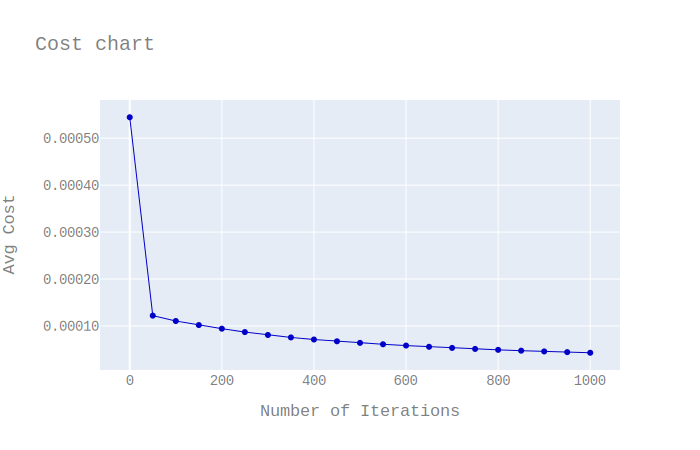

In [12]:
f = create_figure()
plot_figure(f, np.mean(historic_cost,axis=0))

*   ### Experiment #2
    *   Increasing `HIDDEN_LAYER_SIZE` from `10` to `50`.
    *   Reducing `NUMBER_OF_FOLDS` from `10` to `5`. 

In [13]:
HIDDEN_LAYER_SIZE = 50
NUMBER_OF_FOLDS = 5

In [14]:
historic_acc, historic_cost = kfold_cross_validation(
    folded_data,
    INPUT_LAYER_SIZE,
    HIDDEN_LAYER_SIZE,
    OUTPUT_LAYER_SIZE,
    NUMBER_OF_ITERATIONS,
    LEARNING_RATE,
    NUMBER_OF_FOLDS
)

Model parameters:

 input_layer_size: 16 | hidden_layer_size: 50 | output_layer_size: 10
 number_of_iterations: 1000 | learning_rate: 0.1 | number_of_folds: 5

################## EPOCH with test fold = 0 ##################
 Accuracy: 95.46%
 Avg cost: 0.00013

 Confusion Matrix:
 [[78  1  1  0  0  0  1  0  0  1]
 [ 0 61  6  4  0  4  0  0  0  0]
 [ 0  1 83  0  0  0  0  0  0  0]
 [ 0  0  0 59  0  0  0  1  0  0]
 [ 0  0  0  0 66  0  0  0  0  0]
 [ 0  0  0  1  0 77  1  0  1  0]
 [ 0  0  0  0  1  0 76  0  0  0]
 [ 0  0  0  0  0  0  0 72  1  0]
 [ 1  0  0  0  0  0  0  0 73  1]
 [ 2  0  0  2  3  0  0  0  0 70]]

################## EPOCH with test fold = 1 ##################
 Accuracy: 93.06%
 Avg cost: 0.00012

 Confusion Matrix:
 [[73  0  0  0  2  0  0  0  0  2]
 [ 0 63 10  3  0  4  0  0  0  1]
 [ 0  2 70  0  0  0  0  1  0  0]
 [ 0  0  0 63  0  0  0  0  0  0]
 [ 0  0  0  0 82  0  0  0  0  1]
 [ 0  0  0  2  0 65  0  0  0  2]
 [ 0  0  0  0  1  0 83  0  1  0]
 [ 0  4  0  1  0  0  0 76  0  0]
 [

In [15]:
metric_summary(historic_acc,historic_cost)

Summary: 

avg_acc: 94.26% std_acc: 0.78% median_acc: 94.26%
avg_cost: 0.00013 std_cost: 0.00030 median_cost: 0.00005


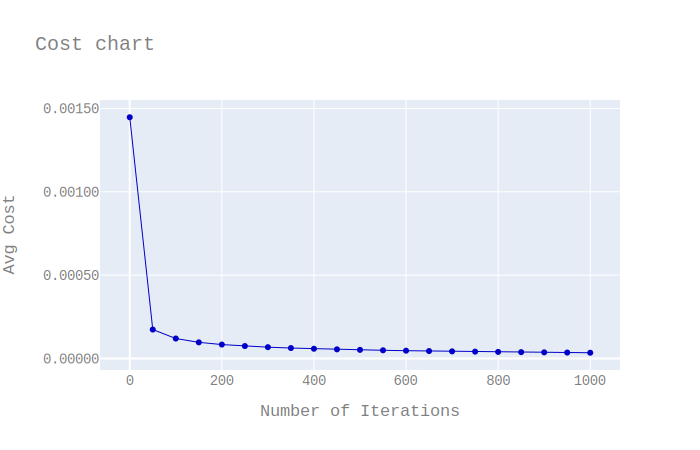

In [16]:
f = create_figure()
plot_figure(f, np.mean(historic_cost,axis=0))

## Dataset `Poker Hand`

The second set of experiments we will be doing is using the [poker hand](https://archive.ics.uci.edu/ml/datasets/Poker+Hand) dataset. The information inside it represents a poker hand. Each row in the dataset is an individual example of a poker hand (5 cards), each card is described using two attributes (suit and rank), for a total of 10 predictive attributes. The last number corresponds to the class of the example.

*   Suits: Ordinal (1-4) representing `{Hearts, Spades, Diamonds, Clubs}`.
*   Rank: Numerical (1-13) representing `{Ace, 2, 3, ... , Queen, King}`.
*   Class: Ordinal (0-9).

    *   0: Nothing in hand; not a recognized poker hand
    *   1: One pair; one pair of equal ranks within five cards
    *   2: Two pairs; two pairs of equal ranks within five cards
    *   3: Three of a kind; three equal ranks within five cards
    *   4: Straight; five cards, sequentially ranked with no gaps
    *   5: Flush; five cards with the same suit
    *   6: Full house; pair + different rank three of a kind
    *   7: Four of a kind; four equal ranks within five cards
    *   8: Straight flush; straight + flush
    *   9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush 



In [17]:
x_data,y_data = load_dataset("../resources/datasets/poker_hand.txt",dtype=np.int64)

In [18]:
# Explore data and class distribution
explore_data(y_data,10)

class: 0 | 12493 (49.95%) instances
class: 1 | 10599 (42.38%) instances
class: 2 | 1206 (4.82%) instances
class: 3 | 513 (2.05%) instances
class: 4 | 93 (0.37%) instances
class: 5 | 54 (0.22%) instances
class: 6 | 36 (0.14%) instances
class: 7 | 6 (0.02%) instances
class: 8 | 5 (0.02%) instances
class: 9 | 5 (0.02%) instances
Total number of instances: 25010


After exploring the data we can observe that it contains `25010` examples of `10`  unbalanced classes which is the main reason we chose this dataset, with the intention of understanding the importance of the distribution of classes inside a dataset can affect the result.

In [19]:
# Using the utility we built to normalize the values of the input layer
x_data = normalization(x_data)

In [20]:
# Applying one-hot encoding to the expected classes understanding that
# the result of this transformation is also normalized
y_data = one_hot(y_data,10)

*   ### Experiment #1

In [21]:
LEARNING_RATE = 0.1
NUMBER_OF_ITERATIONS = 1000
HIDDEN_LAYER_SIZE = 10
INPUT_LAYER_SIZE = 10
OUTPUT_LAYER_SIZE = 10
NUMBER_OF_FOLDS = 10

In [22]:
# Dividing the data in `k` folds as a first step for `k-cross-validation`
folded_data = fold_data(list(zip(x_data,y_data)),k=NUMBER_OF_FOLDS)

In [23]:
historic_acc, historic_cost = kfold_cross_validation(
    folded_data,
    INPUT_LAYER_SIZE,
    HIDDEN_LAYER_SIZE,
    OUTPUT_LAYER_SIZE,
    NUMBER_OF_ITERATIONS,
    LEARNING_RATE,
    NUMBER_OF_FOLDS
)

Model parameters:

 input_layer_size: 10 | hidden_layer_size: 10 | output_layer_size: 10
 number_of_iterations: 1000 | learning_rate: 0.1 | number_of_folds: 10

################## EPOCH with test fold = 0 ##################
 Accuracy: 50.54%
 Avg cost: 0.00003

 Confusion Matrix:
 [[1191   41    0    0    0    0    0]
 [1009   73    0    0    0    0    0]
 [ 107   15    0    0    0    0    0]
 [  42    7    0    0    0    0    0]
 [   8    0    0    0    0    0    0]
 [   3    1    0    0    0    0    0]
 [   3    1    0    0    0    0    0]]

################## EPOCH with test fold = 1 ##################
 Accuracy: 50.14%
 Avg cost: 0.00003

 Confusion Matrix:
 [[1167   71    0    0    0    0    0    0    0]
 [ 976   87    0    0    0    0    0    0    0]
 [ 111   17    0    0    0    0    0    0    0]
 [  46    9    0    0    0    0    0    0    0]
 [   8    2    0    0    0    0    0    0    0]
 [   2    0    0    0    0    0    0    0    0]
 [   3    0    0    0    0    0    0    0

In [24]:
metric_summary(historic_acc,historic_cost)

Summary: 

avg_acc: 51.01% std_acc: 0.86% median_acc: 51.00%
avg_cost: 0.00003 std_cost: 0.00003 median_cost: 0.00003


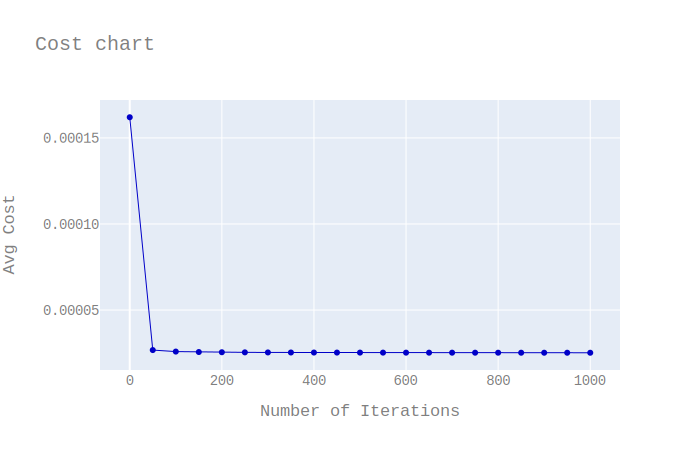

In [25]:
f = create_figure()
plot_figure(f, np.mean(historic_cost,axis=0))

*   ### Experiment #2
    *   Increasing `HIDDEN_LAYER_SIZE` from `10` to `50`.
    *   Reducing `NUMBER_OF_FOLDS` from `10` to `5`.
    *   Increasing `LEARNING_RATE` from `0.1` to `1`.

In [26]:
HIDDEN_LAYER_SIZE = 50
NUMBER_OF_FOLDS = 5
LEARNING_RATE = 1

In [27]:
historic_acc, historic_cost = kfold_cross_validation(
    folded_data,
    INPUT_LAYER_SIZE,
    HIDDEN_LAYER_SIZE,
    OUTPUT_LAYER_SIZE,
    NUMBER_OF_ITERATIONS,
    LEARNING_RATE,
    NUMBER_OF_FOLDS
)

Model parameters:

 input_layer_size: 10 | hidden_layer_size: 50 | output_layer_size: 10
 number_of_iterations: 1000 | learning_rate: 1 | number_of_folds: 5

################## EPOCH with test fold = 0 ##################
 Accuracy: 52.02%
 Avg cost: 0.00008

 Confusion Matrix:
 [[1177   55    0    0    0    0    0]
 [ 958  124    0    0    0    0    0]
 [  99   23    0    0    0    0    0]
 [  38   11    0    0    0    0    0]
 [   6    2    0    0    0    0    0]
 [   3    1    0    0    0    0    0]
 [   3    1    0    0    0    0    0]]

################## EPOCH with test fold = 1 ##################
 Accuracy: 49.90%
 Avg cost: 0.00009

 Confusion Matrix:
 [[1236    2    0    0    0    0    0    0    0]
 [1051   12    0    0    0    0    0    0    0]
 [ 125    3    0    0    0    0    0    0    0]
 [  55    0    0    0    0    0    0    0    0]
 [  10    0    0    0    0    0    0    0    0]
 [   2    0    0    0    0    0    0    0    0]
 [   3    0    0    0    0    0    0    0   

In [28]:
metric_summary(historic_acc,historic_cost)

Summary: 

avg_acc: 49.24% std_acc: 3.97% median_acc: 51.42%
avg_cost: 0.00008 std_cost: 0.00007 median_cost: 0.00007


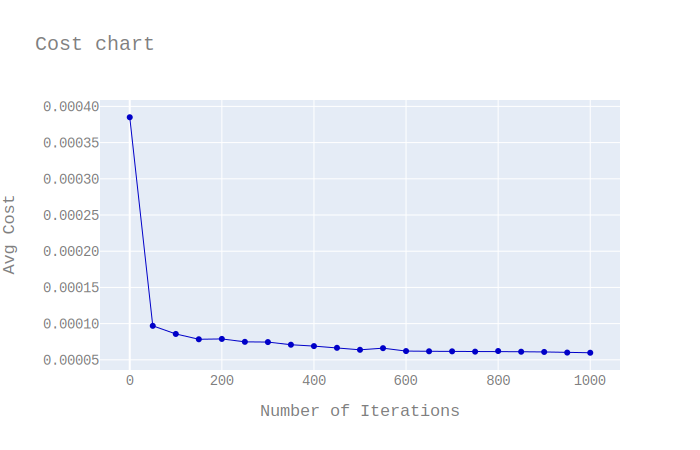

In [29]:
f = create_figure()
plot_figure(f, np.mean(historic_cost,axis=0))

# Result Analysis

* ### Handwritten Digit Results

The first experiment achieved an `avg_acc` of 84.74% using the following parameters for the construction of the model:
  
  * LEARNING_RATE = 0.1
  * NUMBER_OF_ITERATIONS = 1000
  * HIDDEN_LAYER_SIZE = 10
  * INPUT_LAYER_SIZE = 10
  * OUTPUT_LAYER_SIZE = 10
  * NUMBER_OF_FOLDS = 10

On the second experiment we achieved an `avg_acc` of 94.26% by changing the following parameters:
  * HIDDEN_LAYER_SIZE = 50
  * NUMBER_OF_FOLDS = 5

By increasing the number of HIDDEN_LAYER_SIZE we also increase the amount of knowledge we can represent ans store. By decreasing the NUMBER_OF_FOLDS the probability of a fold having little to no examples of a class is lowered. Eventhough the probability of such occurrence is lower in a well balanced dataset it still exists. 


* ### Poker Hand Results

For these experiments we did not notice significant changes in modifying model parameters, this is because the results are entirely biased by the weight of the classes (class distribution) and this factor will be present for any model structure that is defined. This phenomenon is easy to observe in the `confusion matrix` on any of the `EPOCHS`:

```python 
  [[1173   21    0    0    0    0    0    0]
  [1063   48    0    0    0    0    0    0]
  [ 104   14    0    0    0    0    0    0]
  [  54    9    0    0    0    0    0    0]
  [   6    0    0    0    0    0    0    0]
  [   6    0    0    0    0    0    0    0]
  [   1    1    0    0    0    0    0    0]
  [   1    0    0    0    0    0    0    0]]

```

In the previous metric we can notice that only the first two classes are being taken into account by the model, this is because the models' cost function is pondering in the same way all the errors no matter which class they belong to.
  

# Future Strategies
*   Explore more complex model structures (more hidden layers, different activation functions, different cost functions).
*   Explore different strategies for class weighting (for extremely unbalanced datasets).
*   Add metrics like `RECALL`, `F1`.
*   Explore different options for output functions (`SOFTMAX`).